In [120]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

Загружаем excel файл в Dataframe

In [121]:
data = pd.read_excel("D:\__Study__\CluseterTerm\StatLab\Vyborka_Novaya.xlsx")
data = data[1:123]
print(data['ИК'])

1      32.5
2      32.5
3      31.9
4      32.8
5      31.6
       ... 
118    34.7
119    34.5
120    33.8
121    33.7
122    33.8
Name: ИК, Length: 122, dtype: float64


In [122]:
left_table = data[data['МЖ'] == 'левая']    
right_table = data[data['МЖ'] == 'правая']    
right_table_val = right_table['ИК']
left_table_val = left_table['ИК']
# Сбрасываем индексы
right_table_reset = right_table_val.reset_index(drop=True)
left_table_reset = left_table_val.reset_index(drop=True)

merged_table = pd.concat([right_table_reset, left_table_reset], axis=1)
merged_table.columns = ['Правая', 'Левая']
right_val = merged_table.iloc[:,0]
left_val = merged_table.iloc[:,1]

In [123]:
# Замените n на количество наблюдений в вашей таблице
n = len(merged_table.iloc[:,0])

# Рассчитываем количество интервалов с использованием формулы Стерджерса
k = 1 + 3.322 * math.log10(n)

# Округляем значение k до ближайшего целого числа
k = round(k)
# Выводим количество интервалов
print("Число интервалов (групп) по формуле Стерджерса:", k)

# Находим максимальное и минимальное значение в данных у правого
max_value_r = max(right_val)
min_value_r = min(right_val)
print('Правый:', min_value_r, max_value_r)
# Находим максимальное и минимальное значение в данных у левого
max_value_l = max(left_val)
min_value_l = min(left_val)
print('Левый:', min_value_l, max_value_l)
# Рассчитываем шаг разбиения (длину интервала) у левого
h_l = (max_value_l - min_value_l) / k
# Рассчитываем шаг разбиения (длину интервала) у правого
h_r = (max_value_r - min_value_r) / k

half_h_r = h_r / 2
half_h_l = h_l / 2
# Выводим шаг разбиения и полшага
print("Шаг разбиения (длина интервала):", h_l, h_r)
print("Половина шага разбиения:", half_h_l, half_h_r)

Число интервалов (групп) по формуле Стерджерса: 7
Правый: 27.0 35.1
Левый: 27.5 34.9
Шаг разбиения (длина интервала): 1.057142857142857 1.1571428571428573
Половина шага разбиения: 0.5285714285714285 0.5785714285714286


In [124]:
# Создаем список для хранения границ интервалов
interval_boundaries_l = [min_value_l]
interval_boundaries_r = [min_value_r]
# Добавляем остальные границы интервалов
for i in range(k):
    interval_boundaries_l.append(interval_boundaries_l[-1] + h_l)
    interval_boundaries_r.append(interval_boundaries_r[-1] + h_l)
print(interval_boundaries_l)
interval_boundaries_l[0] -= half_h_l
interval_boundaries_r[0] -= half_h_r
interval_boundaries_l[-1] += half_h_l
interval_boundaries_r[-1] += half_h_r
interval_boundaries_l = np.around(interval_boundaries_l, 2)
interval_boundaries_r =  np.around(interval_boundaries_r, 2)
# Границы интервалов
print("Границы интервалов левого:", interval_boundaries_l)
print("Границы интервалов правого:", interval_boundaries_r)


[27.5, 28.557142857142857, 29.614285714285714, 30.67142857142857, 31.728571428571428, 32.785714285714285, 33.84285714285714, 34.9]
Границы интервалов левого: [26.97 28.56 29.61 30.67 31.73 32.79 33.84 35.43]
Границы интервалов правого: [26.42 28.06 29.11 30.17 31.23 32.29 33.34 34.98]


In [132]:
from collections import Counter
# Создаем словарь для хранения данных в интервалах
interval_data_l = {interval: [] for interval in range(k)}
interval_data_r = {interval: [] for interval in range(k)}
# Распределяем данные по интервалам
for value in left_val:
    for i in range(len(interval_boundaries_l) - 1):
        if interval_boundaries_l[i] <= value < interval_boundaries_l[i+1]:
            interval_data_l[i].append(value)
            break
for value in right_val:
    for i in range(len(interval_boundaries_r) - 1):
        if interval_boundaries_r[i] <= value < interval_boundaries_r[i+1]:
            interval_data_r[i].append(value)
            break

for i, arr in interval_data_l.items():
    
    interval_data_l[i] = len(arr)
for i, arr in interval_data_r.items():
    interval_data_r[i] = len(arr)
print(interval_boundaries_r)
interval_data_r


[26.42 28.06 29.11 30.17 31.23 32.29 33.34 34.98]


{0: 1, 1: 1, 2: 1, 3: 8, 4: 12, 5: 20, 6: 16}

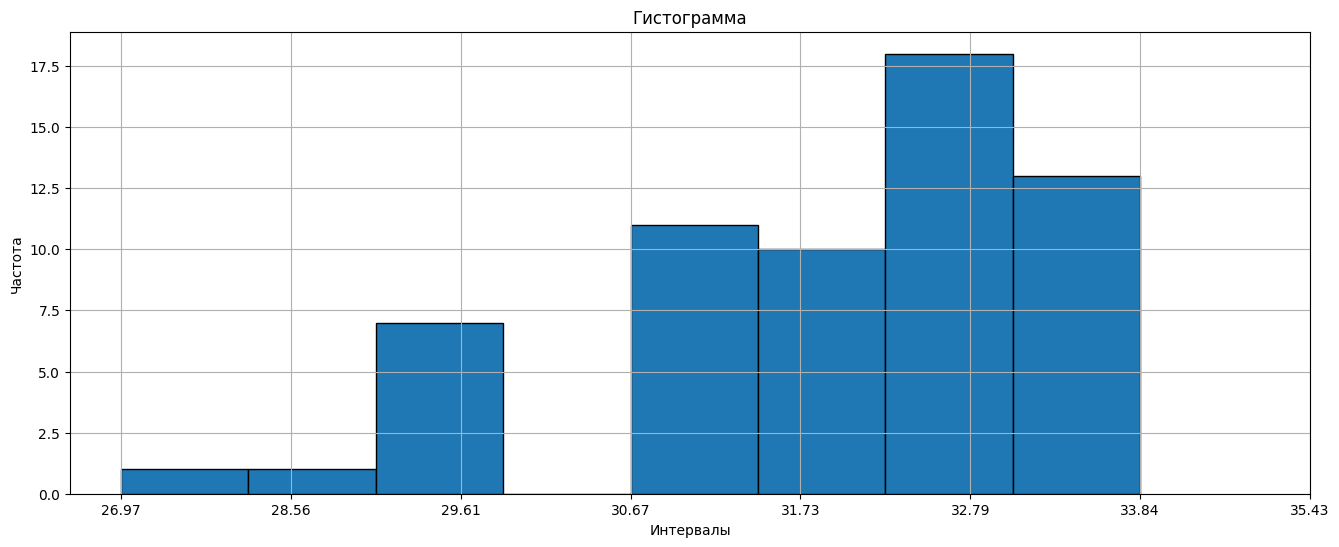

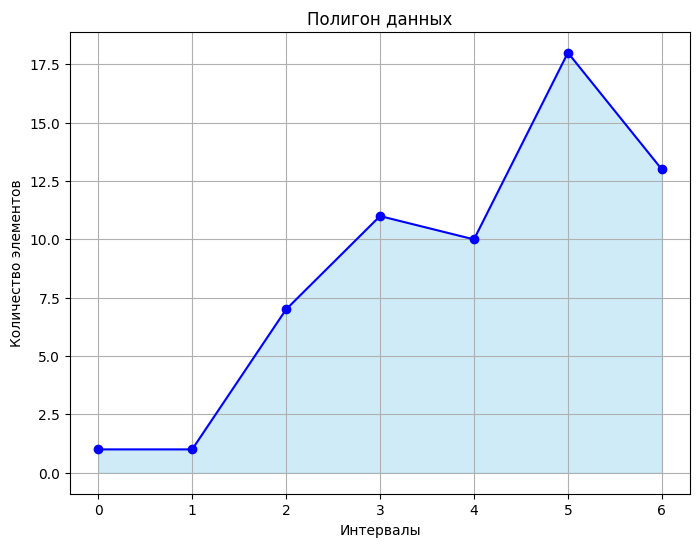

In [126]:
# Создаем списки для построения гистограммы и полигона

# Построение гистограммы
plt.figure(figsize=(16, 6))
plt.hist(list(interval_data_l.keys()), bins=len(interval_boundaries_l), weights=list(interval_data_l.values()), edgecolor='black')
plt.xlabel('Интервалы')
plt.ylabel('Частота')
plt.title('Гистограмма')
plt.xticks(range(len(interval_boundaries_l)), interval_boundaries_l)
plt.grid(True)
plt.show()

# Извлекаем ключи (интервалы) и значения (количество элементов) из словаря
intervals = list(interval_data_l.keys())
counts = list(interval_data_l.values())

# Построение полигона
plt.figure(figsize=(8, 6))
plt.plot(intervals, counts, marker='o', linestyle='-', color='b')
plt.fill_between(intervals, counts, color='skyblue', alpha=0.4)
plt.xlabel('Интервалы')
plt.ylabel('Количество элементов')
plt.title('Полигон данных')
plt.xticks(intervals)  # Устанавливаем метки интервалов на оси x
plt.grid(True)
plt.show()

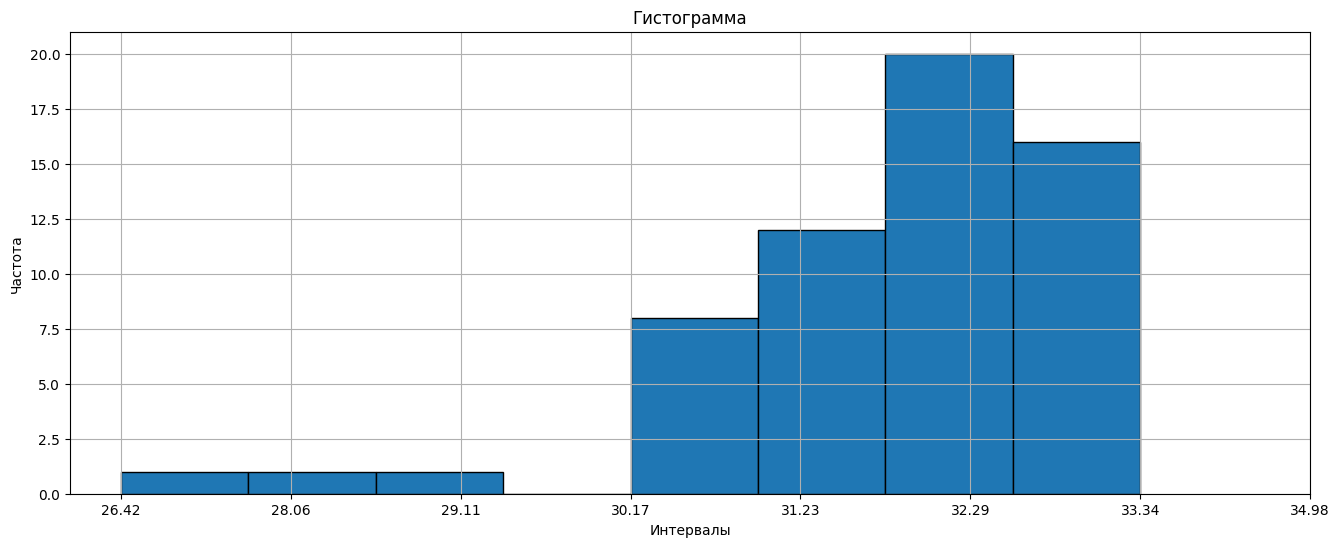

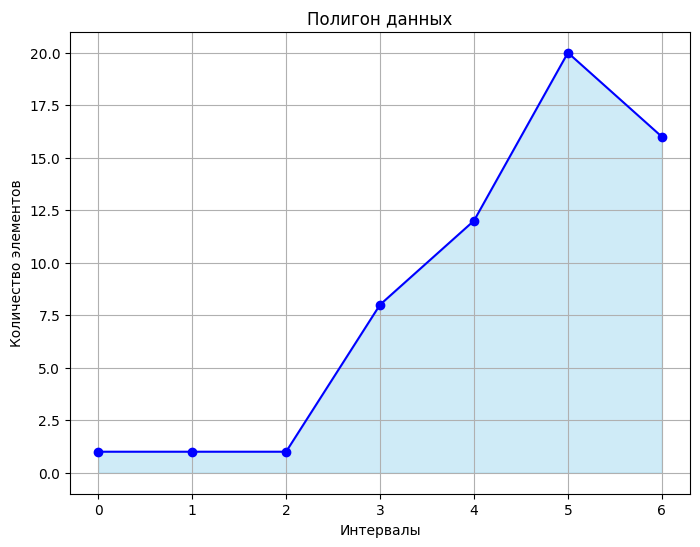

In [127]:
# Создаем списки для построения гистограммы и полигона

# Построение гистограммы
plt.figure(figsize=(16, 6))
plt.hist(list(interval_data_r.keys()), bins=len(interval_boundaries_r), weights=list(interval_data_r.values()), edgecolor='black')
plt.xlabel('Интервалы')
plt.ylabel('Частота')
plt.title('Гистограмма')
plt.xticks(range(len(interval_boundaries_r)), interval_boundaries_r)
plt.grid(True)
plt.show()

# Извлекаем ключи (интервалы) и значения (количество элементов) из словаря
intervals = list(interval_data_r.keys())
counts = list(interval_data_r.values())

# Построение полигона
plt.figure(figsize=(8, 6))
plt.plot(intervals, counts, marker='o', linestyle='-', color='b')
plt.fill_between(intervals, counts, color='skyblue', alpha=0.4)
plt.xlabel('Интервалы')
plt.ylabel('Количество элементов')
plt.title('Полигон данных')
plt.xticks(intervals)  # Устанавливаем метки интервалов на оси x
plt.grid(True)
plt.show()

In [128]:
#2 ЛАБА. Поиск средних.

# несгруп. данные
# print(merged_table)
# сгруп. данные
print(interval_data_l)

{0: 1, 1: 1, 2: 7, 3: 11, 4: 10, 5: 18, 6: 13}


In [129]:
# Выборочная средняя
mean_r = np.mean(right_val)
mean_l = np.mean(left_val)
# Выборочная дисперсия
variance_r = np.var(right_val)
variance_l = np.var(left_val)
# Исправленная выборочная дисперсия
sample_variance_r = np.var(right_val, ddof=1)
sample_variance_l = np.var(left_val, ddof=1)
# Мода
mode_r = stats.mode(right_val)
mode_l = stats.mode(left_val)
# Медиана
median_r = np.median(right_val)
median_l = np.median(left_val)

# Вывод результатов
print("Выборочная средняя правого и левого:", mean_r, mean_l)
print("Выборочная дисперсия правого и левого:", variance_r, variance_l)
print("Исправленная выборочная дисперсия правого и левого:", sample_variance_r, variance_l)
print("Мода правого и левого:", mode_r, mode_l)
print("Медиана правого и левого:", median_r, median_l)

Выборочная средняя правого и левого: 32.5672131147541 32.519672131147544
Выборочная дисперсия правого и левого: 2.3372856758935767 2.327153990862671
Исправленная выборочная дисперсия правого и левого: 2.37624043715847 2.327153990862671
Мода правого и левого: ModeResult(mode=32.5, count=5) ModeResult(mode=32.8, count=4)
Медиана правого и левого: 32.6 32.8
